In [1]:
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, log_loss
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X, y = fetch_openml('Fashion-MNIST', version = 1, return_X_y = True)

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
X = X / 255.0

In [5]:
X_train, X_val, y_train, y_val = train_test_split(X.values, y.values, test_size = 0.2, shuffle = True, random_state = 42)

In [ ]:
X_train.shape

(56000, 784)

In [ ]:
model = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter = 5)

In [ ]:
model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=5)

In [ ]:
y_pred = model.predict(X_val)
y_pred_prob = model.predict_proba(X_val)
accuracy = accuracy_score(y_val, y_pred)
lg_loss = log_loss(y_val.astype(float), y_pred_prob)
cm = confusion_matrix(y_val, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = class_names, )

In [ ]:
print(f'Accuracy Score: {accuracy}')
print(f'Logarithmic Loss: {lg_loss}')

Accuracy Score: 0.8801428571428571
Logarithmic Loss: 0.3312576987038555


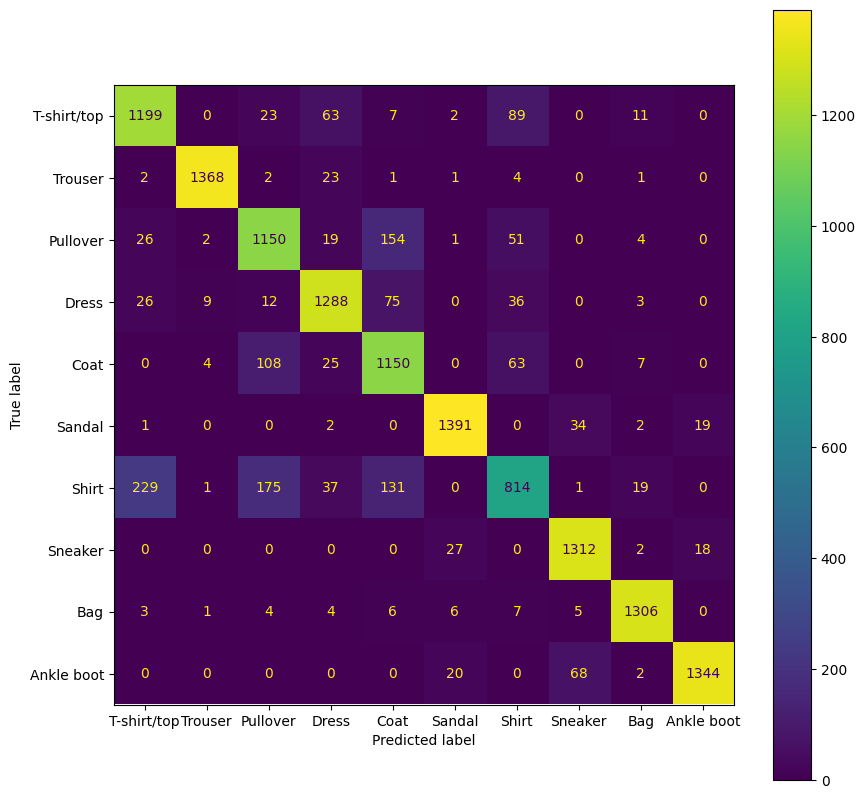

In [ ]:
plt.figure(figsize=(10, 10))
display.plot(ax=plt.gca())
plt.show()

In [ ]:
model_clf = MLPClassifier()

In [ ]:
param = {
    'hidden_layer_sizes': [(100,), (300,100)],
    'alpha': [0.0001, 0.001],
    'learning_rate_init': [0.001],
    'batch_size': [256]
}
grid = GridSearchCV(model_clf, param_grid = param, scoring = 'accuracy')

In [ ]:
grid.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptro

GridSearchCV(estimator=MLPClassifier(),
             param_grid={'alpha': [0.0001, 0.001], 'batch_size': [256],
                         'hidden_layer_sizes': [(100,), (300, 100)],
                         'learning_rate_init': [0.001]},
             scoring='accuracy')

In [ ]:
print(f'Best Params: {grid.best_params_}')
print(f'Best Accuracy Score: {grid.best_score_}')

Best Params: {'alpha': 0.0001, 'batch_size': 256, 'hidden_layer_sizes': (300, 100), 'learning_rate_init': 0.001}
Best Accuracy Score: 0.8931785714285715


In [6]:
model_clf_best = MLPClassifier(hidden_layer_sizes=(300, 100), batch_size = 256, max_iter=500)

In [7]:
model_clf_best.fit(X_train, y_train)

MLPClassifier(batch_size=256, hidden_layer_sizes=(300, 100), max_iter=500)

In [8]:
losses = model_clf_best.loss_curve_

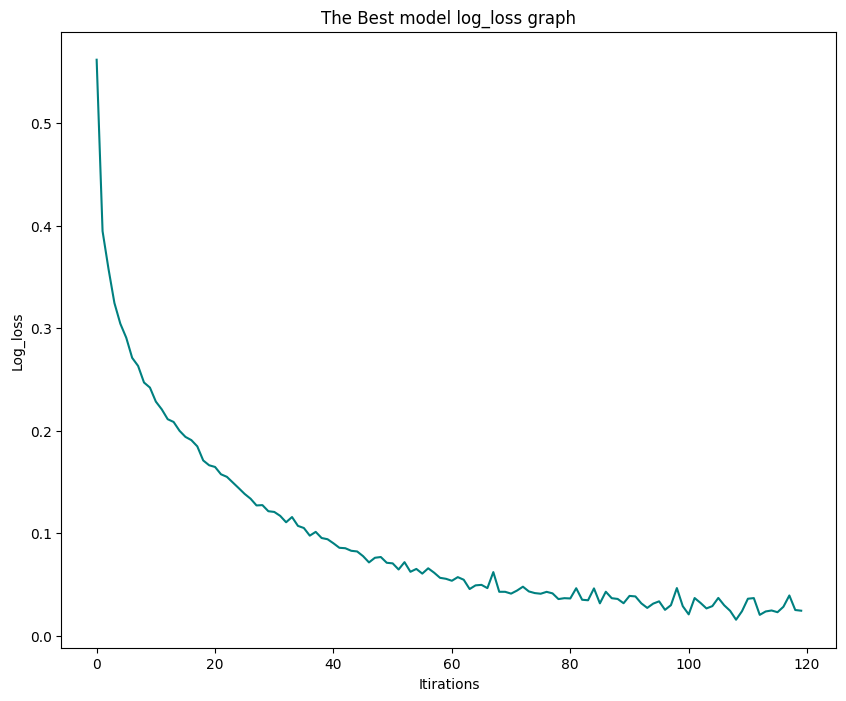

In [14]:
plt.figure(figsize = (10, 8))
plt.plot(np.arange(len(losses)), losses, color = 'teal')
plt.title('The Best model log_loss graph')
plt.xlabel('Itirations')
plt.ylabel('Log_loss')
plt.show()

In [15]:
y_pred_best_model = model_clf_best.predict(X_val)
accuracy = accuracy_score(y_val, y_pred_best_model)
print(f'Accuracy Score: {accuracy}')

Accuracy Score: 0.8995
